# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [7]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.info()
# In City and State, we have object which is likely a string and in Temperature we have float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [192]:
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


#### Select the rows where state is New York

In [12]:
ny = temp[temp.State == "New York"]
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [16]:
ny_temp = ny["Temperature"]
ny_temp_ave = np.average(ny_temp)
ny_temp_ave

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [32]:
warm_temp = temp[temp.Temperature > 15]
warm_temp

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [42]:
warm_cities = set(warm_temp["City"])
warm_cities

['Hartford', 'Treton', 'Newark', 'NYC']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [44]:
temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [191]:
# mean
temp.groupby(['State']).agg({'Temperature':'mean'})

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [193]:
# standard deviation
temp.groupby(['State']).agg({'Temperature':'std'})

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [163]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [164]:
print(employee.info())
print(employee["Salary"].describe())
# We have Name, Department, Education, Gender, Title as objects(strings probably).
# Years and Salary are both integers. 
# The mean of salary is around 49 I imagine that is 49,000
# The std deviation of salaries is 16,000
# The max salary is 70,000 and min is 30,000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes
None
count     9.000000
mean     48.888889
std      16.541194
min      30.000000
25%      35.000000
50%      55.000000
75%      60.000000
max      70.000000
Name: Salary, dtype: float64


In [165]:
employee.keys()

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

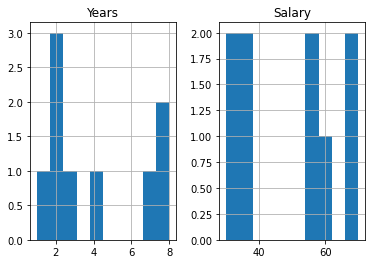

In [166]:
pd.DataFrame.hist(employee)

(array([[7., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 9., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 8., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 9., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 9., 0., 0., 0., 0., 0., 0., 0.],
        [6., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 2., 0., 2., 1., 2.]]),
 array([0.0, 7.0, 14.0, 21.0, 28.0, 35.0, 42.0, 49.0, 56.0, 63.0, 70.0],
       dtype=object),
 <a list of 7 BarContainer objects>)

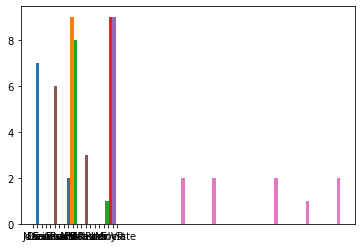

In [167]:
plt.hist(employee)

#### What's the average salary in this company?

In [168]:
ave_sal = np.average(employee["Salary"])
print(f"Average Salary: {ave_sal}")

Average Salary: 48.888888888888886


#### What's the highest salary?

In [169]:
max_sal = np.max(employee["Salary"])
print(f"Max salary is {max_sal},000")

Max salary is 70,000


#### What's the lowest salary?

In [170]:
min_sal = np.min(employee["Salary"])
print(f"Min salary is {min_sal},000")

Min salary is 30,000


#### Who are the employees with the lowest salary?

In [171]:
employee[employee.Salary == min_sal]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [172]:
david_info=employee[employee.Name == "David"]
david_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [173]:
david_sal = list(david_info["Salary"])[0]
print(f"David's Salary: {david_sal},000")


David's Salary: 30,000


#### Print all the rows where job title is associate

In [174]:
employee[employee.Title=="associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [175]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [176]:
employee[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [177]:
employee[(employee.Title == "associate") & (employee.Salary > 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [190]:
employee.groupby(['Years']).agg({'Salary':'mean'})

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [194]:
employee.groupby(['Title']).agg({'Salary':'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [26]:
# draw boxplot here

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [279]:
employee[['Salary','Gender']].groupby('Gender').mean()

,Salary
Gender,
F,47.5
M,50.0


In [281]:
employee.groupby(['Gender']).agg({'Salary':'mean'})

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [224]:
orders = pd.read_csv("Orders.zip")
orders[:5]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [207]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [208]:
# We have InvoiceNo, year, month, day, Quantity, CustomerID are integers
# StockCode, Description, InvoiceData, Country are string objects
# UnitPrice and amount_spent are float

In [209]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [210]:
np.average(orders.amount_spent)

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [211]:
np.max(orders.amount_spent)

168469.6

In [212]:
np.min(orders.amount_spent)

0.0

#### Select all the customers we have in Spain

In [225]:
sp_cust = orders[orders.Country == "Spain"]
sp_cust[:5]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [252]:
len(sp_cust["CustomerID"].value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [250]:
orders["CustomerID"].value_counts()
        
            


17841    7847
14911    5677
14096    5111
12748    4596
14606    2700
         ... 
17331       1
16093       1
13703       1
13307       1
12346       1
Name: CustomerID, Length: 4339, dtype: int64

#### Select orders from Spain that are above 50 items

In [254]:
for val in sp_cust["CustomerID"].value_counts():
    if val > 50:
        print()
    

478
346
273
211
206
147
121
69
62
58
57
52


#### Select all free orders

In [223]:
orders[orders.amount_spent == 0.0][:5]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [257]:
#ny = temp[temp.State == "New York"]

orders[orders.Description == "lunch bag"]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [260]:
orders[orders.year == 2011][:5]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26160,42481,539993,22386,2011,1,2,10,jumbo bag pink polkadot,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5
26161,42482,539993,21499,2011,1,2,10,blue polkadot wrap,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
26162,42483,539993,21498,2011,1,2,10,red retrospot wrap,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
26163,42484,539993,22379,2011,1,2,10,recycling bag retrospot,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5
26164,42485,539993,20718,2011,1,2,10,red retrospot shopper bag,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5


#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [264]:
aug_ord = orders[orders.month == 8][:5]
aug_ord

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [278]:
aug_ord[['Country']].groupby('Country').value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

#### What's the  average amount of money spent by country

In [276]:
orders[['Country','amount_spent']].groupby('Country').mean()[:5]

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


#### What's the most expensive item?

In [273]:
orders["UnitPrice"].max()

8142.75

#### What was the average amount spent per year ?

In [274]:
orders[['year','amount_spent']].groupby('year').mean()

,amount_spent
year,
2010,21.892733
2011,22.430074
